## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?

*Regression models predict/fit for numerical values, while classification models work to categorize points into labels or categories*

2. What is a confusion table? What does it help us understand about a model's performance?

*A confusion table is a quick metric for whether a model is working by showing counts of counts of true positives, true negatives, false positives, and false negatives, while showing how the model matches the real labels, and thus can provide evidence for accuracy.*

3. What does the SSE quantify about a particular model?

*The SSE shows the total squared difference between observed values and a model's predicted values. A lower SSE indicates a better fit, while a higher SSE means more error in the model.*

4. What are overfitting and underfitting?

*Overfitting happens when the model has too many data points and thus too much noise, which means that there are too many assumptions being made, so the model is less applicable to new data. On the other hand underfitting occurs when a model is too simple to capture the underlying pattern in data, resulting in poor training performance.*

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

*Splitting the data into training and testing sets helps test how well the model will generalize to new data. Choosing k based on test set accuracy or SSE reduces overfitting by choosing a model with appropriate amounts of error, realistic for the data of the model.*

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

*Predicting a class label is simple to understand but does not state uncertainty. Predicting probabilities provides information about confidence and allows flexible decision-making but it is harder to interpret*

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving USA_cars_datasets.csv to USA_cars_datasets.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Pandas automatically uses some pyplot functions, so we need it loaded
import seaborn as sns # Import Seaborn

df = pd.read_csv('USA_cars_datasets.csv') # Local file

df.head()
print(df.shape)
df.value_counts()

(2499, 13)


,,,,,,,,,,,,,count
Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,
2498,9200,nissan,versa,2018,clean vehicle,31371,silver,3n1cn7ap4jl884311,167762228,florida,usa,21 hours left,1
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,1
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,1
2482,12100,nissan,altima,2019,clean vehicle,36974,gray,1n4bl4cv8kc157345,167722413,california,usa,1 days left,1
2481,9200,nissan,versa,2018,clean vehicle,39577,silver,3n1cn7ap7jl883833,167762212,florida,usa,2 days left,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,13350,gmc,door,2017,clean vehicle,23525,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left,1
6,7300,chevrolet,pk,2010,clean vehicle,149050,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left,1
5,5700,dodge,mpv,2018,clean vehicle,45561,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left,1


In [4]:
df.columns.tolist()

['Unnamed: 0',
 'price',
 'brand',
 'model',
 'year',
 'title_status',
 'mileage',
 'color',
 'vin',
 'lot',
 'state',
 'country',
 'condition']

In [5]:
df = df[['price','year','mileage']]
print(df.head(20))
print(df.shape)
print(print(df.isna().sum()))

    price  year  mileage
0    6300  2008   274117
1    2899  2011   190552
2    5350  2018    39590
3   25000  2014    64146
4   27700  2018     6654
5    5700  2018    45561
6    7300  2010   149050
7   13350  2017    23525
8   14600  2018     9371
9    5250  2017    63418
10  10400  2009   107856
11  12920  2017    39650
12  31900  2018    22909
13   5430  2017   138650
14  20700  2013   100757
15  12710  2017    25747
16   5200  2018    46194
17  16500  2018    20002
18   5210  2017    35714
19  38100  2013    54380
(2499, 3)
price      0
year       0
mileage    0
dtype: int64
None


There are no missing values in this dataset for these columns!

In [6]:
def maxmin(c): #this is taken from the KNN ipynb provided for us and talked about in class!! i just switched it to my own variable names
    a = (c-np.min(c))/(np.max(c)-np.min(c))
    return a

df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])

df.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [10]:
from sklearn.model_selection import train_test_split #had to use ChatGPT to explain this a little bit better

x_train, x_test, y_train, y_test = train_test_split(df, df['price'], test_size=0.2, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

k_values = [3, 10, 25, 50, 100, 300]
mse_results = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse

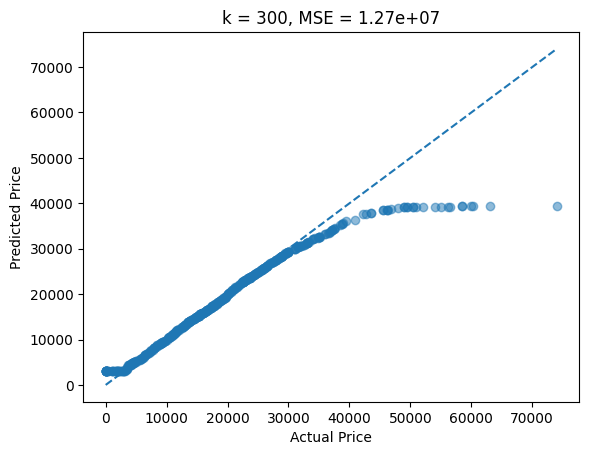

In [12]:

    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k = {k}, MSE = {mse:.2e}")
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             linestyle="--")
    plt.show()



**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.